In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [1]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [5]:
data = pd.read_csv('Wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [7]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [8]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [9]:
data['ID'] = range(1, 179, 1)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [10]:
df = data.drop('Type',axis=1)

In [11]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
null_count_col = df.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    14
dtype: int64 

Null Percentage for Columns:

 0.0    14
dtype: int64


In [14]:
null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    178
dtype: int64 

Null Percentage for Rows:

 0.0    178
dtype: int64


In [15]:
df.duplicated().sum()

0

In [16]:
df[df.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID


In [17]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

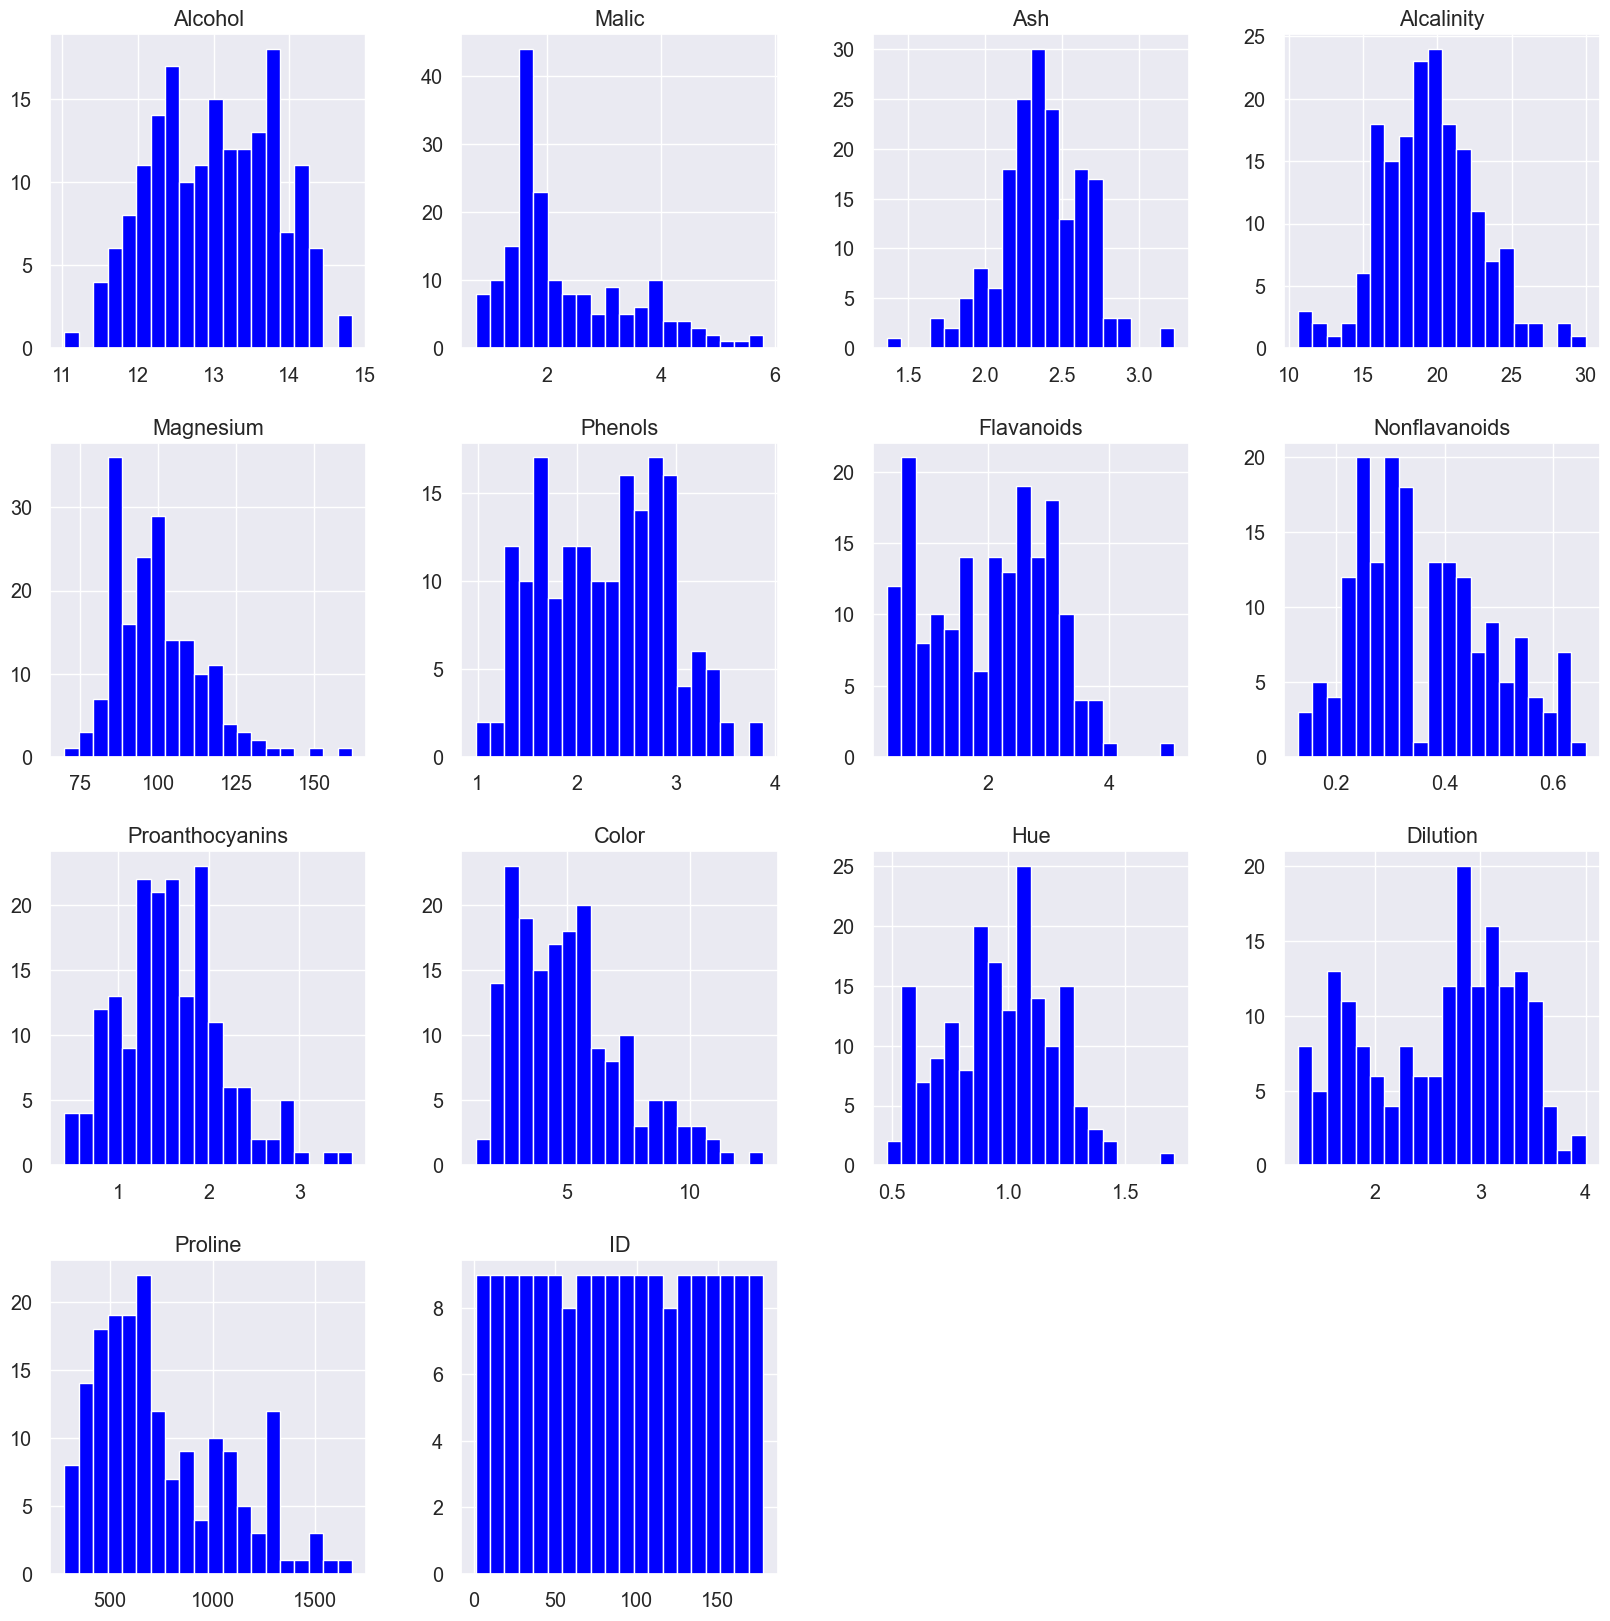

In [18]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )


In [19]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

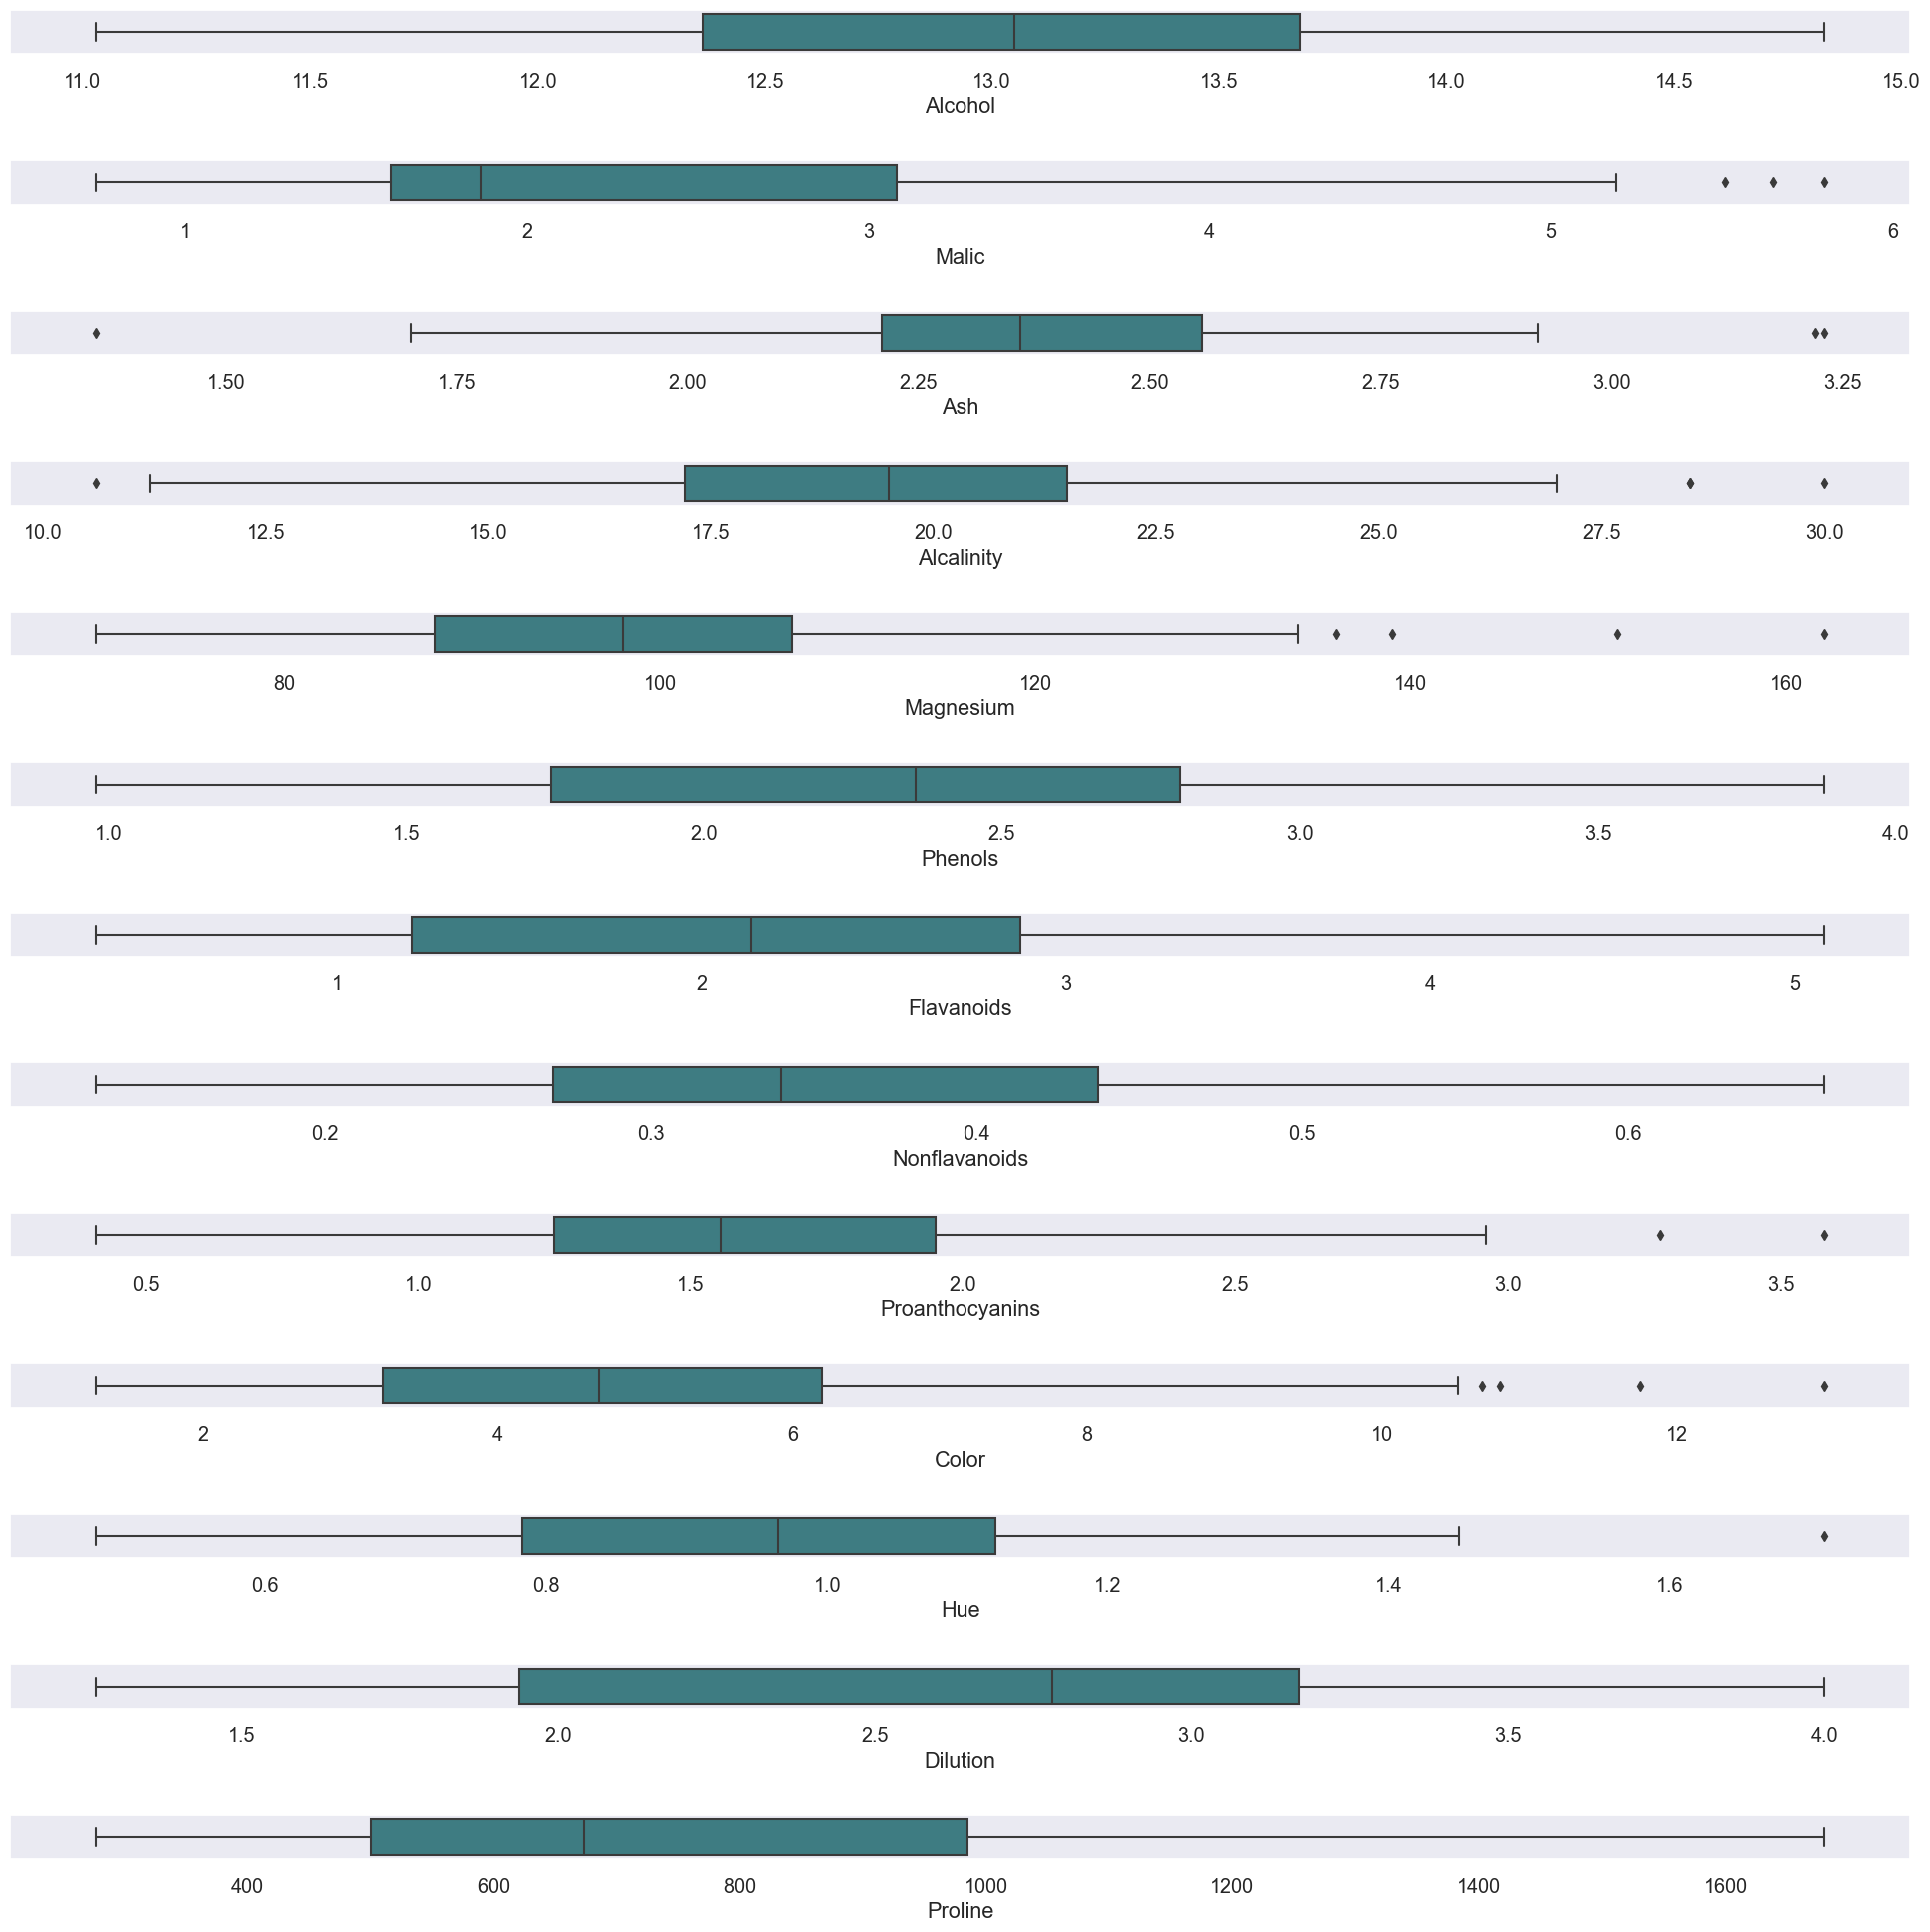

In [20]:
ot=df.copy() 
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

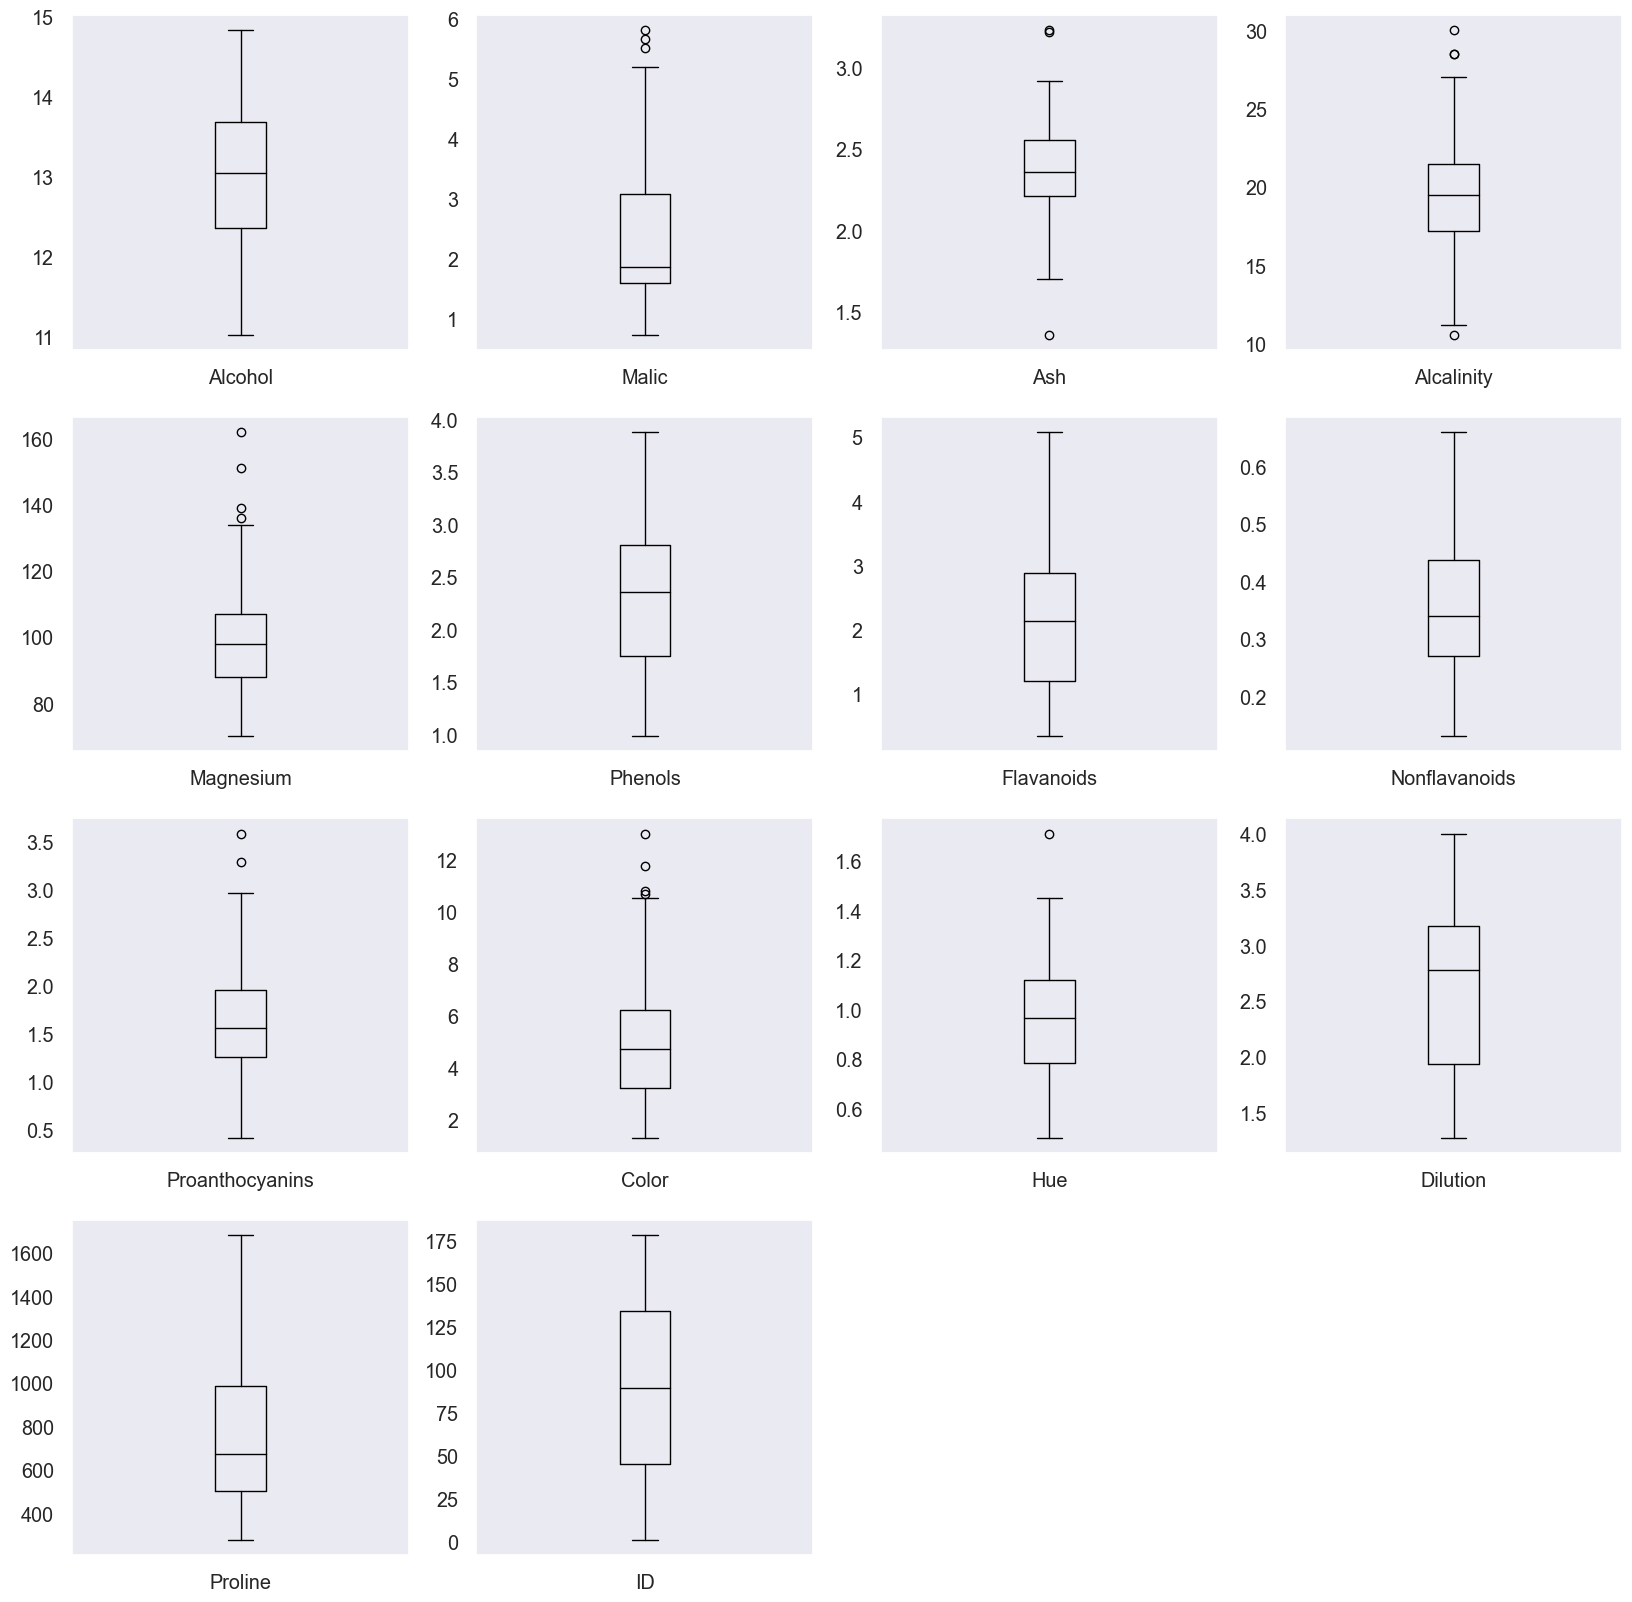

In [21]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

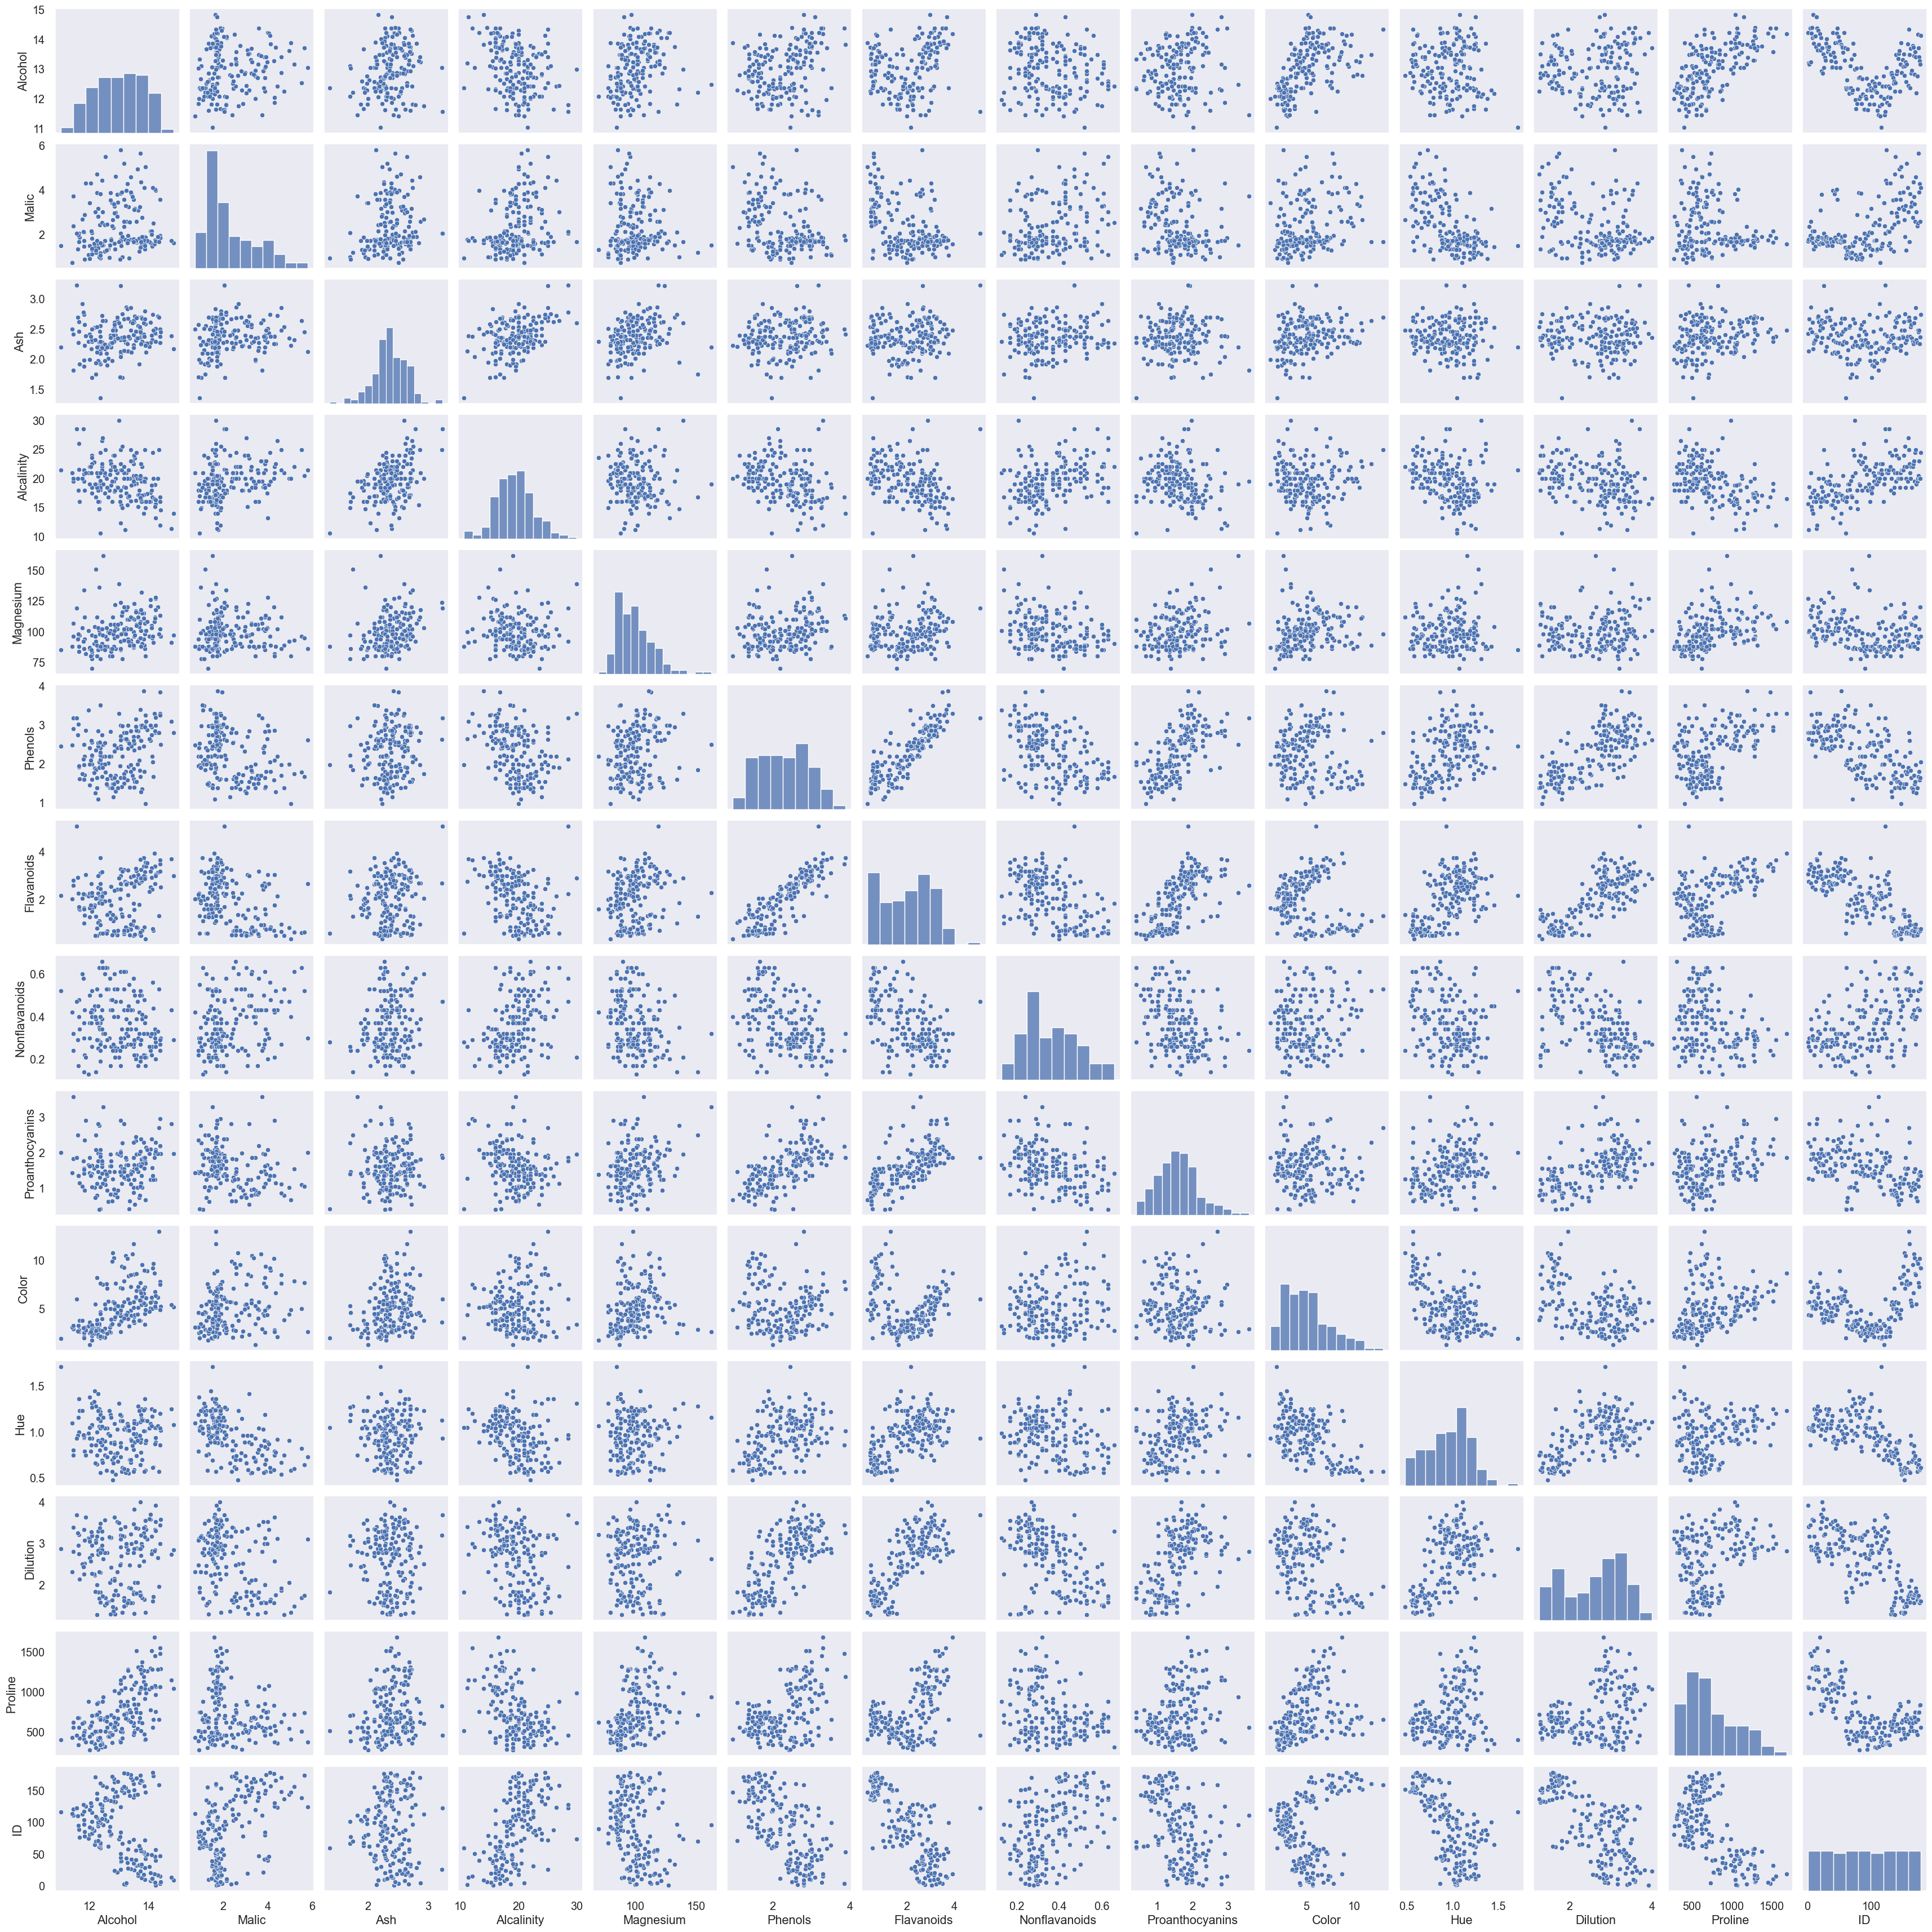

In [22]:
sns.pairplot(df,palette="dark")

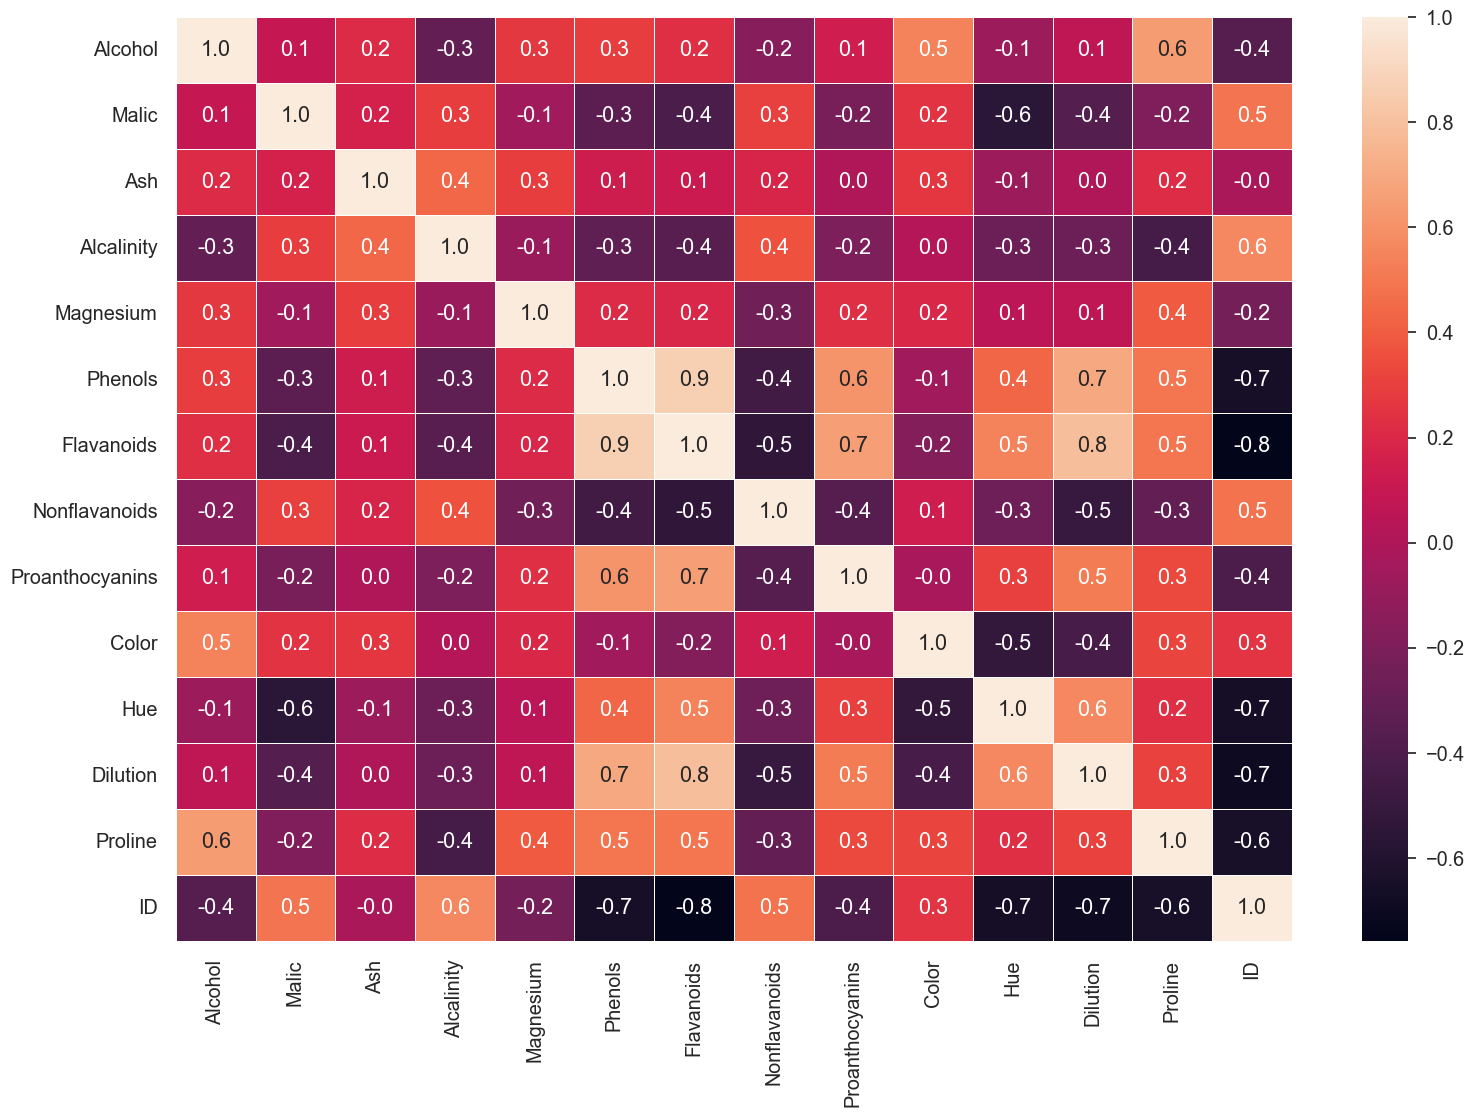

In [23]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

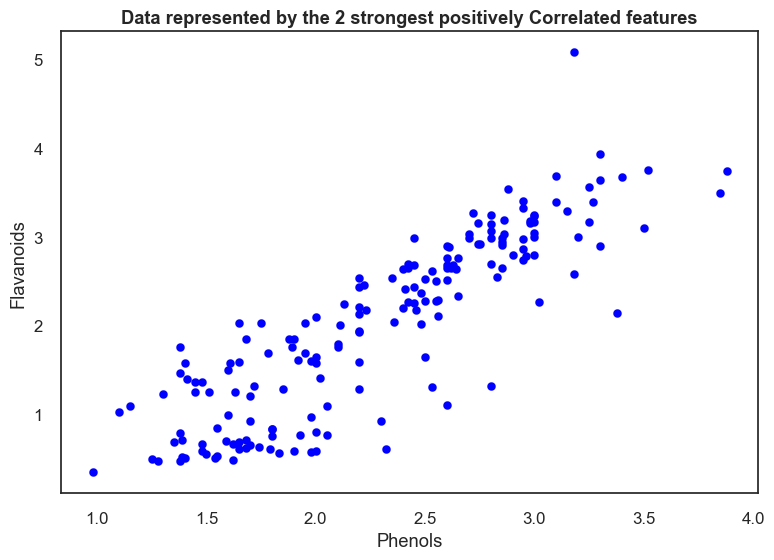

In [24]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

In [25]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

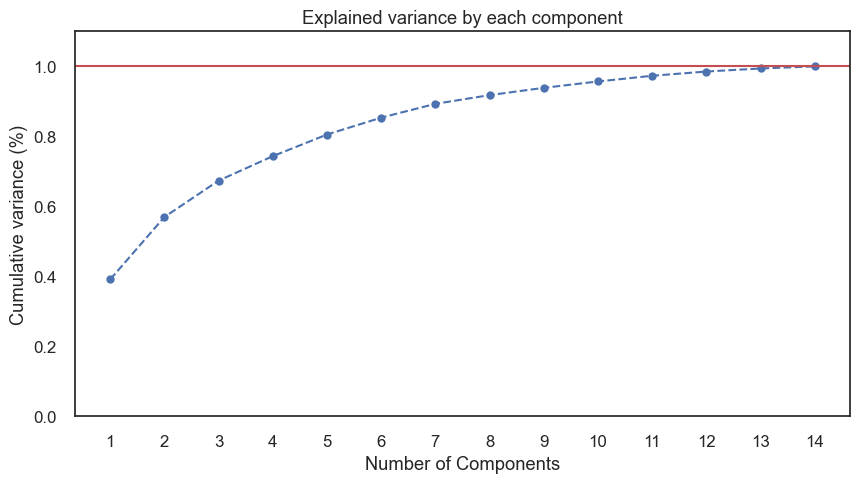

In [27]:
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [28]:
var = pca_var.explained_variance_ratio_
var 

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

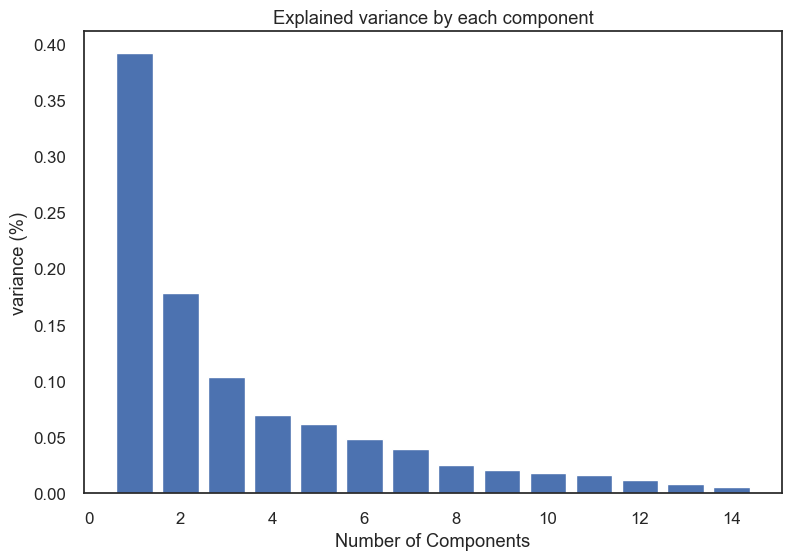

In [29]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [30]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [31]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


,PC1,PC2,PC3
0,3.723816,-1.447476,-0.153274
1,2.734987,0.334166,-2.079717
2,2.944840,-1.033583,0.979570
3,4.094144,-2.762344,-0.123541
4,1.550429,-0.867267,1.915570


Text(0, 0.5, 'PC2')

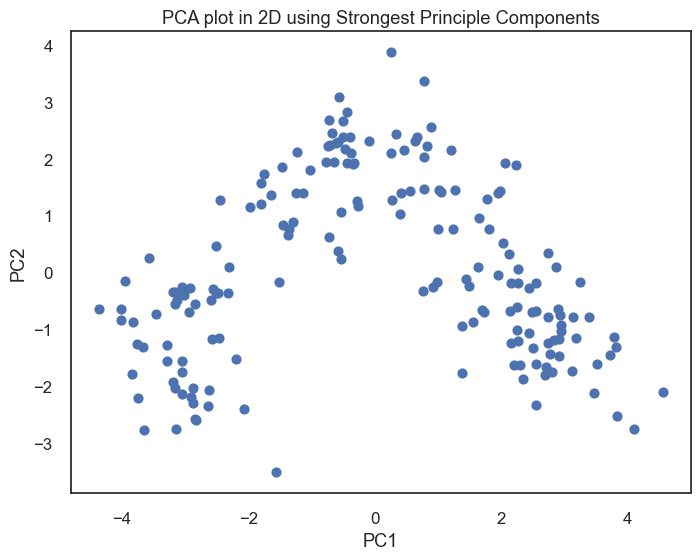

In [32]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

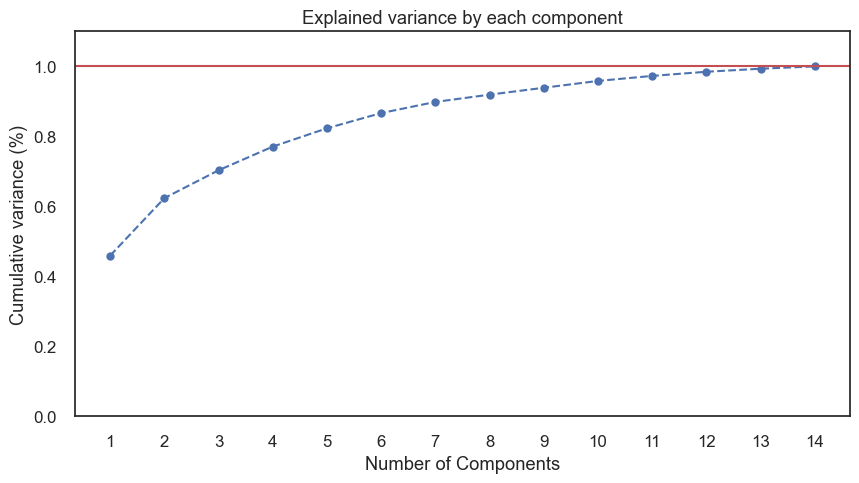

In [33]:
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [34]:
var = pca_var.explained_variance_ratio_
var 

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

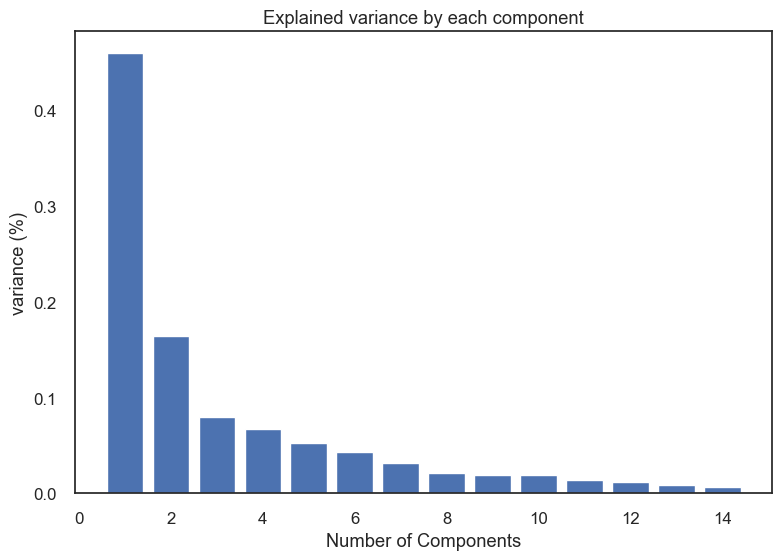

In [35]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [36]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [37]:
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


,PC1,PC2,PC3
0,0.864955,-0.246505,0.012715
1,0.676158,-0.011751,-0.306279
2,0.692172,-0.186686,0.139093
3,0.955057,-0.568299,0.123337
4,0.411640,-0.067685,0.118278


Text(0, 0.5, 'PC2')

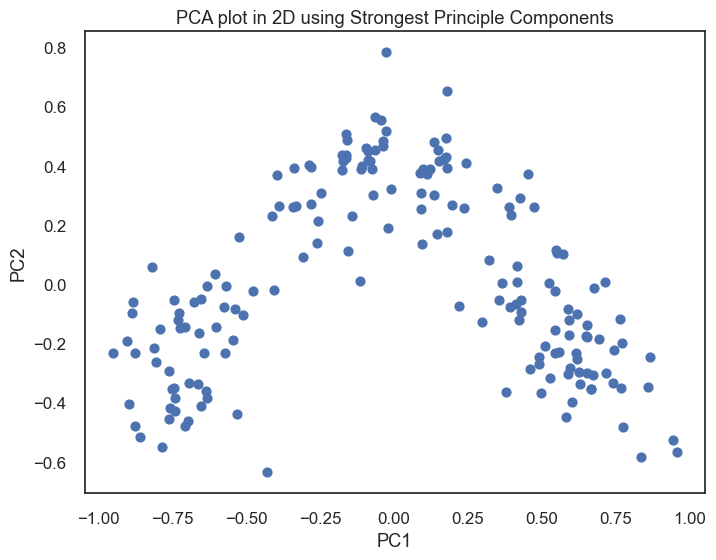

In [38]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [39]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:17<00:00,  2.14s/it]


In [40]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:13<00:00,  1.73s/it]


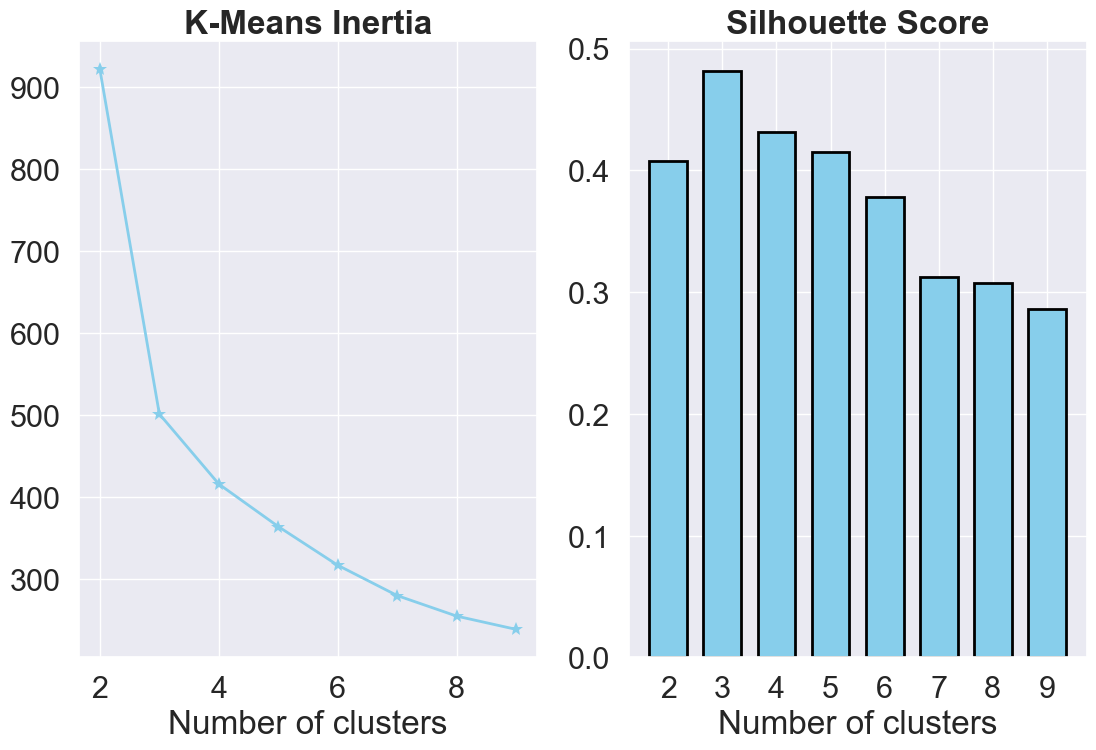

In [41]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

In [43]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method


TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

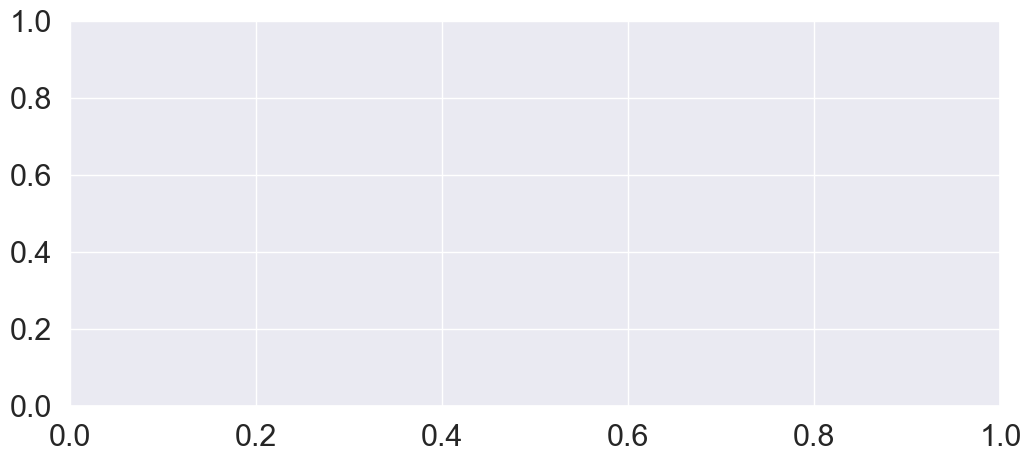

In [44]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_df)    
visualizer.show()
plt.show()